In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import matplotlib.pyplot as plt


In [ ]:

DATASET_PATH = '/content/drive/MyDrive/Cat&dog Task/dataset'
CATEGORIES = ['cats_set', 'dogs_set']
IMG_SIZE = 64


In [ ]:
#  Load and preprocess images
def load_images():
    data = []
    for category in CATEGORIES:
        folder_path = os.path.join(DATASET_PATH, category)
        label = CATEGORIES.index(category)
        for img_name in tqdm(os.listdir(folder_path), desc=f'Loading {category}'):
            try:
                img_path = os.path.join(folder_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append([img.flatten(), label])  # Flatten for SVM
            except Exception as e:
                print(f"Skipping {img_name}: {e}")
    return data


In [ ]:
#  Prepare data
data = load_images()
X = np.array([item[0] for item in data])
y = np.array([item[1] for item in data])

Loading dogs_set: 100%|██████████| 500/500 [00:09<00:00, 51.86it/s] 


In [ ]:
#  Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the SVM
model = SVC(kernel='linear')  # Try 'rbf' too
model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
#  Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))


✅ Accuracy: 0.5522388059701493
📋 Classification Report:
               precision    recall  f1-score   support

         Cat       0.53      0.61      0.57        97
         Dog       0.58      0.50      0.54       104

    accuracy                           0.55       201
   macro avg       0.55      0.55      0.55       201
weighted avg       0.56      0.55      0.55       201



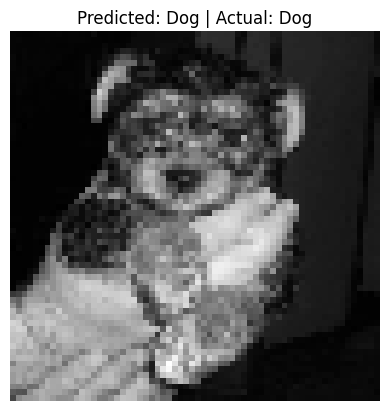

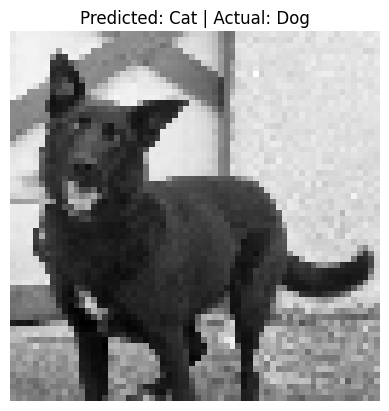

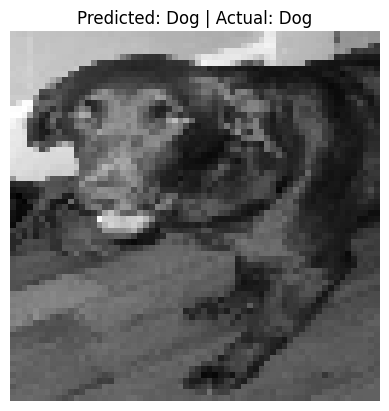

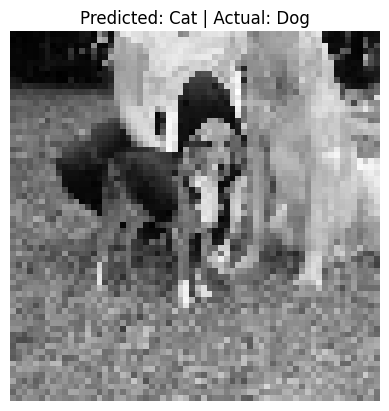

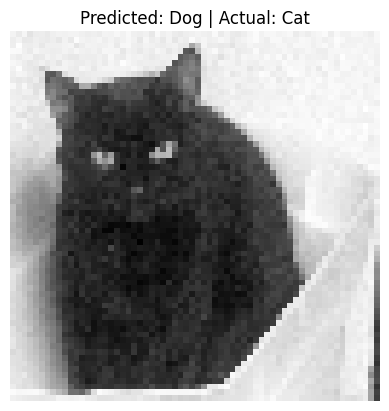

In [ ]:
#  Show predictions
for i in range(5):
    img = X_test[i].reshape(IMG_SIZE, IMG_SIZE)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {'Dog' if y_pred[i] else 'Cat'} | Actual: {'Dog' if y_test[i] else 'Cat'}")
    plt.axis('off')
    plt.show()